Abstract : Based on space observation data, find out if its a star, galaxy or quasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read the dataset
df =pd.read_csv('skyserver.csv')

In [3]:
df = df[[c for c in df if c not in ['class']] + ['class']]
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR


In [4]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  redshift   10000 non-null  float64
 14  plate      10000 non-null  int64  
 15  mjd        10000 non-null  int64  
 16  fiberid    10000 non-null  int64  
 17  class      10000 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


    1. No Null values are present.
    2. class variable is of object type - we should encode it.

In [5]:
#find out how many types of classes are there
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [6]:
#Statistical Description of the data
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Observations :
        1. Wide gap between run,field,redshift,plate,mjd. Hence outliers may be present.
        2. Mean > 50% in dec,plate,mjd columns. Hence right skewed data.
        3. Mean < Median in  ra,run,camcol,fiberid columns. Hence left skewed data.
        4. rerun column has a single value and can be dropped.
        5. objid can also be dropped.

# Data Visualization 

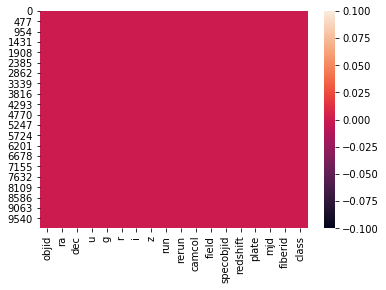

In [7]:
sns.heatmap(df.isnull())

Text(0, 0.5, 'Frequency')

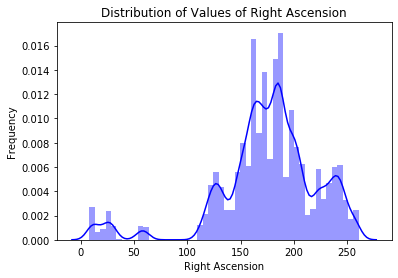

In [8]:
sns.distplot(df['ra'],color='blue')
plt.title("Distribution of Values of Right Ascension")
plt.xlabel("Right Ascension")
plt.ylabel("Frequency")

    Right Ascension values range between 0 to 250,highly concentrated between 150 and 200. Slight left skewness can be seen.

Text(0.5, 1.0, 'Categories of Space')

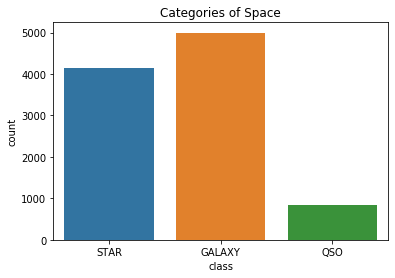

In [9]:
sns.countplot(df['class'])
plt.title("Categories of Space")

        Thre classes present - Star, Galaxy and Qso, out of which Galaxy has highest observations.

In [10]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR


Text(0, 0.5, 'Z-Band')

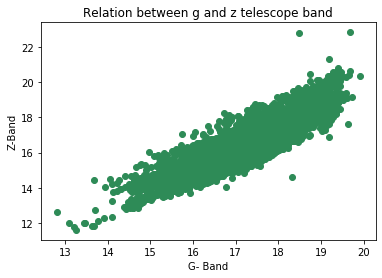

In [11]:
plt.scatter('g','z',data=df,color='seagreen')
plt.title("Relation between g and z telescope band")
plt.xlabel("G- Band")
plt.ylabel("Z-Band")

Text(0, 0.5, 'R-Band')

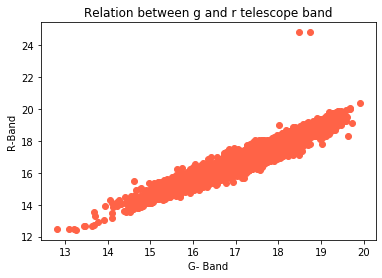

In [12]:
plt.scatter('g','r',data=df,color='tomato')
plt.title("Relation between g and r telescope band")
plt.xlabel("G- Band")
plt.ylabel("R-Band")

Text(0, 0.5, 'I-Band')

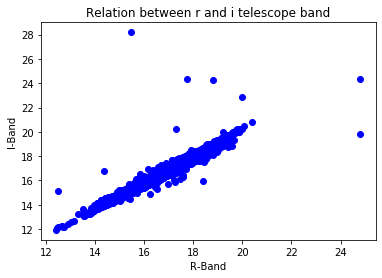

In [13]:
plt.scatter('r','i',data=df,color='blue')
plt.title("Relation between r and i telescope band")
plt.xlabel("R-Band")
plt.ylabel("I-Band")

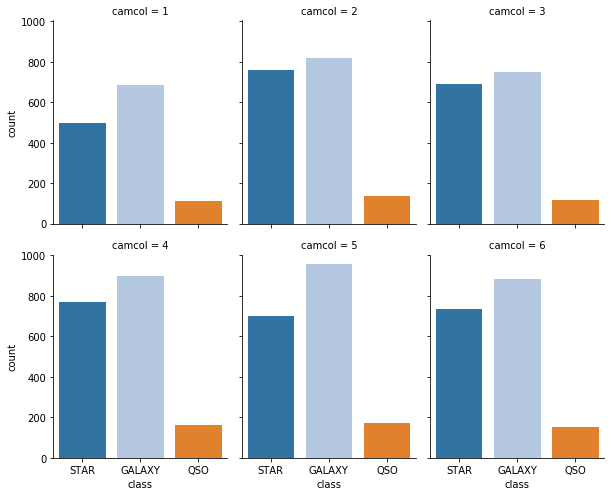

In [14]:
sns.catplot("class", col="camcol", col_wrap=3,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

    Based on camcol, we can see Galaxy has been classified widely.

Text(0.5, 1, 'Classification of galaxy based on mjd and plate')

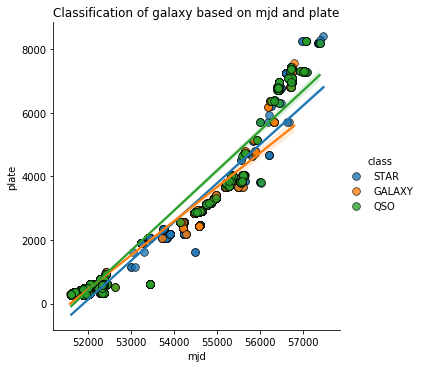

In [15]:
sns.lmplot('mjd','plate',data=df,hue='class',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Classification of galaxy based on mjd and plate")

Text(0.5, 1, 'Classification of galaxy based on specobjid and plate')

<Figure size 504x792 with 0 Axes>

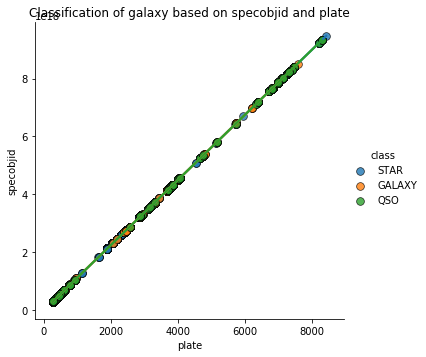

In [16]:
plt.figure(figsize=(7,11))
sns.lmplot('plate','specobjid',data=df,hue='class',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Classification of galaxy based on specobjid and plate")

# Data Manipulation

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

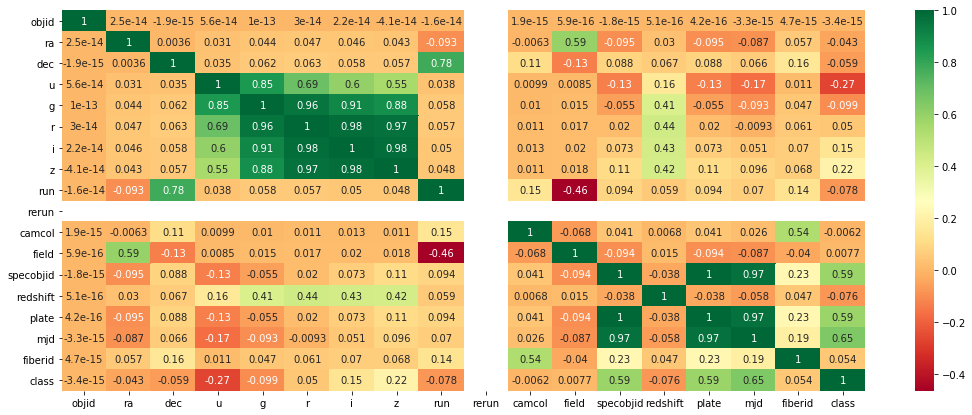

In [18]:
#Correlation : 
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

Observation : 
    1. We can drop rerun column, as all the rows have same values.
    2. We can also drop objid, as it will not have an impact on our analysis.
    3. Columns u,g,r,i and z are highly correlated to each other.
    4. Columns specobjid,plat,mjid has a high positive correlation with target variable class.
    5. Redshift is correlated to u,g,r,i,and z values.
    

In [19]:
df.drop('rerun',inplace=True,axis=1)
df.drop('objid',inplace=True,axis=1)

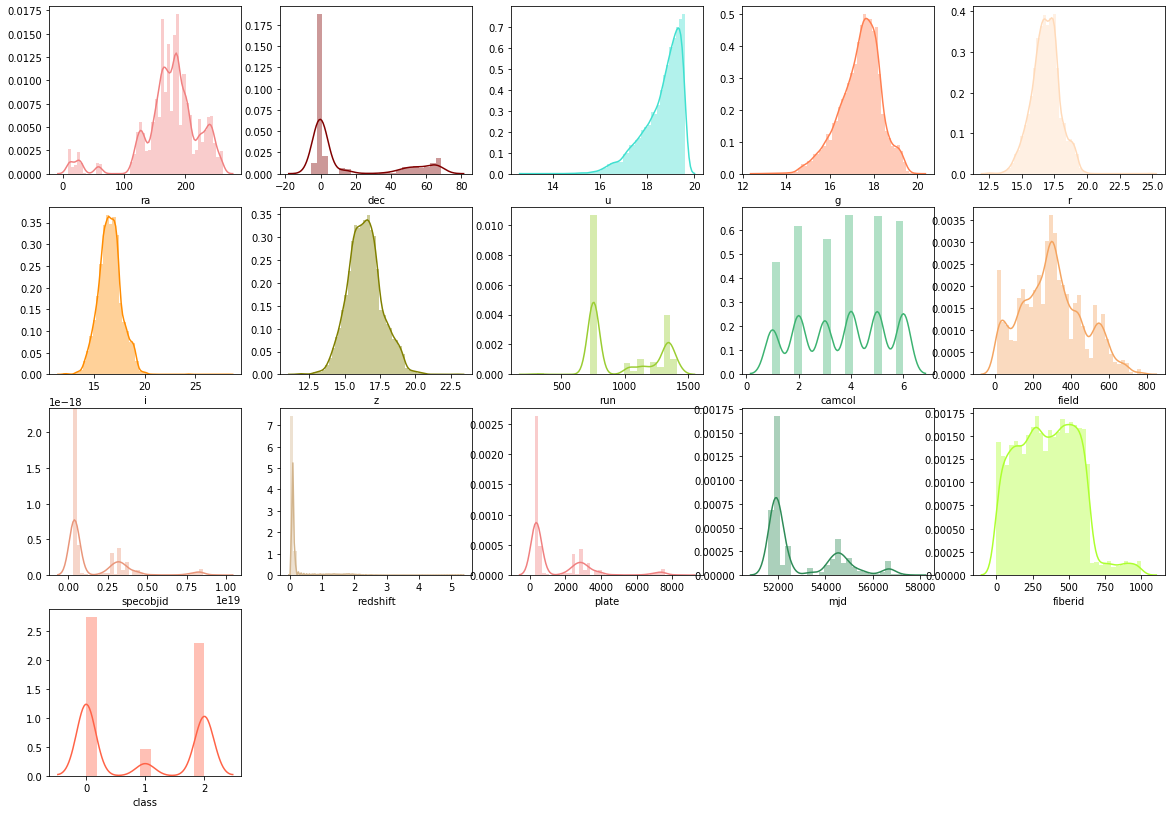

In [20]:
#Check fro skewness :
col = df.columns.values
colors = ['lightcoral','maroon','turquoise','coral','peachpuff','darkorange','olive','yellowgreen','mediumseagreen',
         'sandybrown','darksalmon','tan','lightcoral','seagreen','greenyellow','tomato','limegreen']
plt.figure(figsize=(20,40))
for i in range(0,len(col)):
    plt.subplot(11,5,i+1)
    sns.distplot(df[col[i]],color=colors[i])
plt.show()
    

    1. Right skewness occurs in columns - dec,specobjid,mjid,plate,redshift
    2. Left Skewness occurs in columns - u,slightly in g as well.

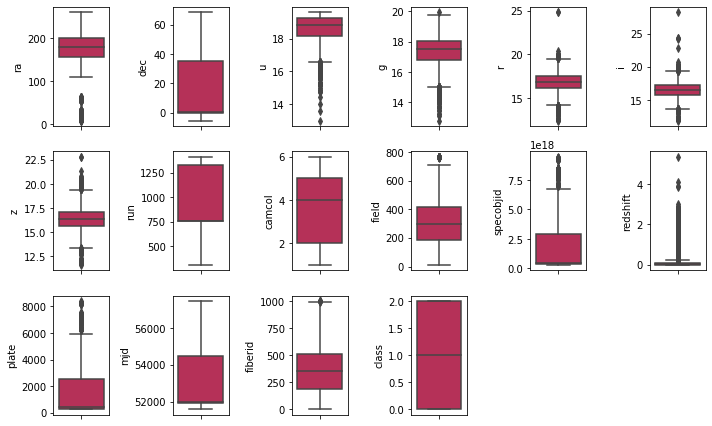

In [21]:
#Check for outliers :
plt.figure(figsize=(10,20))
for i in range(0,len(col)):
    plt.subplot(10,6,i+1)
    sns.boxplot(df[col[i]],palette='rocket',orient='v')
    plt.tight_layout()

    Outliers exist in columns - ra, u,g,r,z,i,field,specobjid,redshift,plate,fibreid.

In [22]:
#Use z-score to remove outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(df))
print(np.where(z>3))


(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([11, 11, 11, ..., 12, 10, 12], dtype=int64))


In [23]:
#new df with no outliers.
df_new = df[(z<3).all(axis=1)]

In [24]:
print(df.shape,"\t",df_new.shape)

(10000, 16) 	 (8698, 16)


In [25]:
from sklearn.model_selection import train_test_split

#Features where Class is the target variable
X = df_new.drop('class',axis=1)
y = df_new.iloc[:,-1:]


In [26]:
X.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

In [27]:
#To remove skewness
X['dec'] = np.sqrt(X['dec'])
X['plate'] = np.sqrt(X['plate'])
X['specobjid'] = np.log10(X['specobjid'])
X['redshift'] = np.cbrt(X['redshift'])
X['specobjid'] = np.sqrt(X['specobjid'])
X['plate'] = np.sqrt(X['plate'])
X['mjd'] = np.sqrt(X['mjd'])

In [28]:
X.skew()

ra          -0.130951
dec          0.312530
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.747294
redshift     0.383962
plate        0.844344
mjd          0.956708
fiberid      0.065374
dtype: float64

In [29]:
#Scaling of Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8698 non-null   float64
 1   1       5186 non-null   float64
 2   2       8698 non-null   float64
 3   3       8698 non-null   float64
 4   4       8698 non-null   float64
 5   5       8698 non-null   float64
 6   6       8698 non-null   float64
 7   7       8698 non-null   float64
 8   8       8698 non-null   float64
 9   9       8698 non-null   float64
 10  10      8698 non-null   float64
 11  11      8698 non-null   float64
 12  12      8698 non-null   float64
 13  13      8698 non-null   float64
 14  14      8698 non-null   float64
dtypes: float64(15)
memory usage: 1019.4 KB


    After removal of skewness and scaling more than 50% of the data in column 1 is null. And also has a negative correlation with the target variable. Hence We can drop this column.

In [31]:
X.drop(1,axis=1,inplace=True)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(40,100):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        if score>max_score:
            max_score = score
            final_state = i

    return final_state

In [34]:
model = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

for i in range(len(model)):
    state = calBestRandomStateOf(model[i])
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=state)
    model[i].fit(x_train,y_train)
    score = model[i].score(x_train,y_train)
    y_pred = model[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("*************************************************************************************")
    print("Random State : ",state)
    print("Score of ",model[i]," is : ", score)
    print("Accuracy : ",accuracy*100,"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")


*************************************************************************************
Random State :  95
Score of  DecisionTreeClassifier()  is :  1.0
Accuracy :  99.36781609195403 % 
Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       982
           1       0.90      0.96      0.93        67
           2       1.00      1.00      1.00       691

    accuracy                           0.99      1740
   macro avg       0.97      0.98      0.97      1740
weighted avg       0.99      0.99      0.99      1740

Confusion Matrix :
 
[[975   7   0]
 [  3  64   0]
 [  1   0 690]]
*************************************************************************************
*************************************************************************************
Random State :  77
Score of  KNeighborsClassifier()  is :  0.9811727507904571
Accuracy :  98.67816091954023 % 
Classification Report : 

              precision    recall

In [35]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

model = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in range(len(model)):
    cv_score = cross_val_score(model[i],X,y,cv=4,scoring='accuracy')
    print("*************************************************************************************")
    print("Score for ",model[i]," : ")
    print("Score : ", cv_score)
    print("Mean : ", cv_score.mean())
    print("Standard Deviation : ", cv_score.std())
    print("*************************************************************************************")
    print("")

*************************************************************************************
Score for  DecisionTreeClassifier()  : 
Score :  [0.98712644 0.98482759 0.98712052 0.98206072]
Mean :  0.9852838139347989
Standard Deviation :  0.0020835801115871126
*************************************************************************************

*************************************************************************************
Score for  KNeighborsClassifier()  : 
Score :  [0.97103448 0.97517241 0.96918123 0.98160074]
Mean :  0.9742472163182438
Standard Deviation :  0.004767496409971336
*************************************************************************************

*************************************************************************************
Score for  SVC()  : 
Score :  [0.98390805 0.9908046  0.98528059 0.98850046]
Mean :  0.9871234231090527
Standard Deviation :  0.0027010167254448493
*************************************************************************************



In [36]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV

param_dict = {'C': [0.1, 1, 10],  
              'gamma': [10,1, 0.1, 0.01], 
              'kernel': ['linear','rbf']
             }

gridsearch = GridSearchCV(SVC(),param_dict,n_jobs=-1,pre_dispatch=2)
gridsearch.fit(X,y)
gridsearch.best_params_
                         

{'C': 10, 'gamma': 10, 'kernel': 'linear'}

In [37]:
#Using the best parameters, build a svc model:

from sklearn.metrics import mean_absolute_error, mean_squared_error

svc = SVC(C=10,gamma=10,kernel='linear')
state = calBestRandomStateOf(svc)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state = state )

svc.fit(x_train,y_train)
score = svc.score(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print("Score for SVC : ",score)
print("Accuracy Score for SVC : ",accuracy)
print("Classification Report : \n")
print(classification_report(y_test,y_pred))
print("Confusion Matrix :\n ")
print(confusion_matrix(y_test,y_pred))
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))


Score for SVC :  0.9913768324231101
Accuracy Score for SVC :  0.996551724137931
Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       0.96      0.96      0.96        78
           2       1.00      1.00      1.00       697

    accuracy                           1.00      1740
   macro avg       0.99      0.99      0.99      1740
weighted avg       1.00      1.00      1.00      1740

Confusion Matrix :
 
[[962   3   0]
 [  3  75   0]
 [  0   0 697]]
Mean Absolute Error :  0.0034482758620689655
Mean Squared Error :  0.0034482758620689655
Root Mean Squared Error :  0.058722021951470346


In [39]:
cv_score = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print("*************************************************************************************")
print("Score for ",svc," : ")
print("Score : ", cv_score)
print("Mean : ", cv_score.mean())
print("Standard Deviation : ", cv_score.std())
print("*************************************************************************************")
print("")

*************************************************************************************
Score for  SVC(C=10, gamma=10, kernel='linear')  : 
Score :  [0.99137931 0.99252874 0.9954023  0.98677401 0.99367453]
Mean :  0.9919517756935219
Standard Deviation :  0.002910115268215275
*************************************************************************************



In [40]:
#Adaboost Regressor and RandomforestRegressor
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import ExtraTreesClassifier as ETC

ada = ABC(n_estimators=20,random_state=41)
gradient = GBC(n_estimators=20,random_state=162)
rfc = RFC(n_estimators=20,random_state=115)
bc = BC(n_estimators=20,random_state=42)
etc = ETC(n_estimators=20,random_state=86)

boosting_model = [ada,gradient,rfc,bc,etc]

for i in range(len(boosting_model)):
    boost = boosting_model[i]
    boost.fit(x_train,y_train)
    pred = boost.predict(x_test)
    accuracyScore = accuracy_score(y_test,pred)
    print("-----------------------------------------------------------")
    print(boost)
    print("-----------------------------------------------------------")
    print("Accuracy Score : ", accuracyScore)
    print("\n")

-----------------------------------------------------------
AdaBoostClassifier(n_estimators=20, random_state=41)
-----------------------------------------------------------
Accuracy Score :  0.9540229885057471


-----------------------------------------------------------
GradientBoostingClassifier(n_estimators=20, random_state=162)
-----------------------------------------------------------
Accuracy Score :  0.993103448275862


-----------------------------------------------------------
RandomForestClassifier(n_estimators=20, random_state=115)
-----------------------------------------------------------
Accuracy Score :  0.993103448275862


-----------------------------------------------------------
BaggingClassifier(n_estimators=20, random_state=42)
-----------------------------------------------------------
Accuracy Score :  0.9948275862068966


-----------------------------------------------------------
ExtraTreesClassifier(n_estimators=20, random_state=86)
--------------------------

In [41]:
baggingClassifier = BC(n_estimators=20,random_state=162)
baggingClassifier.fit(x_train,y_train)
y_pred= baggingClassifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score for Bagging Classifier : ",round(accuracy*100,2),"%")
print("Classification Report : \n")
print(classificationReport)
print("Confusion Matrix :\n ")
print(confusionMatrix)
print("Mean Absolute Error : " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : " ,mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy Score for Bagging Classifier :  99.48 %
Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       982
           1       0.97      0.94      0.95        67
           2       1.00      1.00      1.00       691

    accuracy                           0.99      1740
   macro avg       0.99      0.98      0.98      1740
weighted avg       0.99      0.99      0.99      1740

Confusion Matrix :
 
[[977   2   3]
 [  4  63   0]
 [  0   0 691]]
Mean Absolute Error :  0.005747126436781609
Mean Squared Error :  0.006896551724137931
Root Mean Squared Error :  0.08304547985373997


    Out of all the models, Bagging Classifier works the best giving out accuracy of 99.48%.

In [43]:
#saving the model
import joblib

joblib.dump(baggingClassifier,'baggingModel.obj')

bootingModel_from_joblib = joblib.load('baggingModel.obj')

final_output = pd.DataFrame(bootingModel_from_joblib.predict(x_test))

In [44]:
final_output[0].value_counts()

0    964
2    698
1     78
Name: 0, dtype: int64

In [45]:
#save final output to a csv file :
final_output.to_csv("Space_Server_Classifier_Output.csv")